# FINAL PROJECT CSCI E-82: TRANSFORMERS AND CNNs utilized to Predict Animated Media Type

by **YUVRAJ PURI**

In [222]:
import pandas as pd
import numpy as np


In [223]:
import warnings
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# DATA ANALYSIS

In [224]:
df = pd.read_csv("MAL-anime.csv")

In [225]:
df

,Unnamed: 0,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44
...,...,...,...,...,...,...,...,...,...,...
12769,12769,Neko no Ongaeshi,1090,Movie,1,Jul 2002 - Jul 2002,259386,https://myanimelist.net/anime/597/Neko_no_Onga...,https://cdn.myanimelist.net/r/100x140/images/a...,7.72
12770,12770,Kowasugimasu.,12283,ONA,1,Mar 2018 - Mar 2018,352,https://myanimelist.net/anime/42014/Kowasugimasu,https://cdn.myanimelist.net/r/100x140/images/a...,4.80
12771,12771,Bloody Date,12661,ONA,1,Nov 2006 - Nov 2006,4112,https://myanimelist.net/anime/11691/Bloody_Date,https://cdn.myanimelist.net/r/100x140/images/a...,4.21
12772,12772,Deliver Police: Nishitokyo-shi Deliver Keisats...,11318,ONA,1,Mar 2021 - Mar 2021,485,https://myanimelist.net/anime/48575/Deliver_Po...,https://cdn.myanimelist.net/r/100x140/images/a...,5.34


Here's what the columns refer to:

- `Title`: Name of the anime
- `Rank`: Ranking of the anime
- `Type`: Category of anime e.g. TV, ONA, Movie, Special, etc.
- `Episodes`: Number of episodes of the anime
- `Aired`: Date of airing of an anime
- `Members`: Number of members who have watched/read the anime
- `page_url`: The URL link to the page of the particular anime
- `image_url`: The URL link to the cover image of the particular anime
- `Score`: Average user rating/score of the anime

In [226]:
df.dtypes

,0
Unnamed: 0,int64
Title,object
Rank,int64
Type,object
Episodes,object
Aired,object
Members,int64
page_url,object
image_url,object
Score,float64


In [227]:
print(df.Type.value_counts(), "\n")
print(df.Type.value_counts() / df.shape[0] * 100)

Type
TV         4510
Movie      2485
Special    2014
ONA        1883
OVA        1881
Unknown       1
Name: count, dtype: int64 

Type
TV         35.306090
Movie      19.453578
Special    15.766401
ONA        14.740880
OVA        14.725223
Unknown     0.007828
Name: count, dtype: float64


The majority of the works are TV. We have a single Unknown classification which we shall drop to avoid confounding the data as there is only a single instance of it.

In [228]:
print(df[df['Type'] == 'Unknown'])

      Unnamed: 0                Title  Rank     Type Episodes  \
6260        6260  Sekai Meisaku Douwa  8611  Unknown       20   

                    Aired  Members  \
6260  Oct 1975 - Feb 1983      735   

                                               page_url  \
6260  https://myanimelist.net/anime/7398/Sekai_Meisa...   

                                              image_url  Score  
6260  https://cdn.myanimelist.net/r/100x140/images/a...   6.06  


In [229]:
# Drop rows where 'Type' is 'Unknown'
df = df[df['Type'] != 'Unknown']

# Reset the index
df.reset_index(drop=True, inplace=True)

In [230]:
df['Type'].value_counts()

,count
Type,
TV,4510
Movie,2485
Special,2014
ONA,1883
OVA,1881


Successfully dropped.

## Gathering information on the data and adjusting it

### Aired

In [231]:
df[df['Aired'].str.contains("-")].shape


(12773, 10)

All the dates are given in a range format (e.g. March 2017 - March 2018). Therefore, we can use it as the delimiter for the dates for a date-time conversion.

In [232]:
df['Start_year'] = df['Aired'].apply(lambda x: x.split('-')[0].strip()[:])
df['End_year'] = df['Aired'].apply(lambda x: x.split('-')[1].strip()[:])

In [233]:
df.head()

,Unnamed: 0,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,Start_year,End_year
0,0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55,Oct 2017,Dec 2017
1,1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55,Jul 1997,Jul 1997
2,2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29,2015,2015
3,3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36,Jul 2001,Dec 2001
4,4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44,Dec 2018,Apr 2019


In [234]:
print(df[df['Start_year'] == ''].index.shape)
print(df[df['End_year'] == ''].index.shape)

(8,)
(113,)


The ones that have issues.

In [235]:
nostart = df[df['Start_year'] == ''].index.tolist()
noend = df[df['End_year'] == ''].index.tolist()
merged_list = list(set(nostart) | set(noend))
print("Merged without duplicates:", len(merged_list))

Merged without duplicates: 113


In [236]:
df.shape

(12773, 12)

In [237]:
df = df.drop(merged_list)
df.reset_index(drop=True, inplace=True)

In [238]:
df.shape

(12660, 12)

We've successfully dropped the shows with invalid dates.

### Rank

In [239]:
print(min(df['Rank']))
print(max(df['Rank']))

1
12788


In [240]:
df['Rank'].isna().sum()

0

In [241]:
df[df['Rank'] == ''].shape

(0, 12)

No missing ranks but there's a discrepancy in the ranks given and the max rank.

In [242]:
df[df['Rank'] > 12774]

,Unnamed: 0,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,Start_year,End_year
933,935,Kokuhaku,12785,ONA,1,Aug 2015 - Aug 2015,6745,https://myanimelist.net/anime/31634/Kokuhaku,https://cdn.myanimelist.net/r/100x140/images/a...,2.31,Aug 2015,Aug 2015
1024,1027,Aki no Puzzle,12784,Movie,1,2003 - 2003,2332,https://myanimelist.net/anime/22179/Aki_no_Puzzle,https://cdn.myanimelist.net/r/100x140/images/a...,2.36,2003,2003
2341,2356,Shitcom,12779,ONA,1,Sep 2012 - Sep 2012,20765,https://myanimelist.net/anime/16608/Shitcom,https://cdn.myanimelist.net/r/100x140/images/a...,2.76,Sep 2012,Sep 2012
3097,3115,Love Bites,12782,ONA,1,Mar 2016 - Mar 2016,4203,https://myanimelist.net/anime/32894/Love_Bites,https://cdn.myanimelist.net/r/100x140/images/a...,2.59,Mar 2016,Mar 2016
4150,4179,Ai (ONA),12781,ONA,1,Aug 2012 - Aug 2012,4364,https://myanimelist.net/anime/32294/Ai_ONA,https://cdn.myanimelist.net/r/100x140/images/a...,2.63,Aug 2012,Aug 2012
4206,4236,Hametsu no Mars,12786,OVA,1,Jul 2005 - Jul 2005,65792,https://myanimelist.net/anime/413/Hametsu_no_Mars,https://cdn.myanimelist.net/r/100x140/images/a...,2.22,Jul 2005,Jul 2005
5263,5305,Super Child,12777,Movie,1,Jul 1994 - Jul 1994,1413,https://myanimelist.net/anime/7900/Super_Child,https://cdn.myanimelist.net/r/100x140/images/a...,2.90,Jul 1994,Jul 1994
5314,5356,Ningen Doubutsuen,12780,Movie,1,1962 - 1962,4210,https://myanimelist.net/anime/6953/Ningen_Doub...,https://cdn.myanimelist.net/r/100x140/images/a...,2.74,1962,1962
7006,7065,Utsu Musume Sayuri,12787,OVA,1,2003 - 2003,20866,https://myanimelist.net/anime/13405/Utsu_Musum...,https://cdn.myanimelist.net/r/100x140/images/a...,1.98,2003,2003
8735,8813,Madonna (Movie),12776,Movie,1,2005 - 2005,1385,https://myanimelist.net/anime/22177/Madonna_Movie,https://cdn.myanimelist.net/r/100x140/images/a...,2.91,2005,2005


For some reaosn, there's a discrepancy in the ranks and the number of items in the dataframe.

In [243]:
# Check for duplicate ranks
duplicate_ranks = df[df.duplicated(subset='Rank', keep=False)]
print(f"Duplicate ranks:\n{duplicate_ranks}")

Duplicate ranks:
Empty DataFrame
Columns: [Unnamed: 0, Title, Rank, Type, Episodes, Aired, Members, page_url, image_url, Score, Start_year, End_year]
Index: []


There are no duplicated ranks so no ties in the ranks. That means some rankings are outright missing.

In [244]:
# Generate the full range of expected ranks
expected_ranks = set(range(1, 12775))  # Full range from 1 to 12774

# Extract the unique ranks from the dataframe
actual_ranks = set(df['Rank'].dropna().astype(int))  # Ensure ranks are integers and non-NaN

# Find the missing (skipped) ranks
missing_ranks = expected_ranks - actual_ranks

if missing_ranks:
    print(f"Ranks below 12774 that are missing: {sorted(missing_ranks)}")
else:
    print("No ranks below 12774 are missing.")

Ranks below 12774 that are missing: [55, 57, 201, 267, 301, 312, 379, 501, 506, 654, 751, 868, 936, 965, 1051, 1181, 1197, 1256, 1274, 1401, 1600, 1605, 1730, 1782, 1903, 1920, 2028, 2051, 2086, 2161, 2260, 2351, 2398, 2525, 2596, 2621, 2676, 2701, 2710, 2732, 2794, 2795, 2802, 2981, 3087, 3091, 3105, 3330, 3551, 3645, 3653, 3888, 3906, 3924, 3933, 3939, 3948, 4120, 4158, 4314, 4419, 4486, 4577, 4668, 4721, 4725, 4763, 4790, 4811, 4850, 4885, 4945, 5001, 5175, 5292, 5371, 5376, 5419, 5504, 5586, 5770, 5822, 5851, 6145, 6246, 6374, 6729, 7240, 7308, 7327, 7569, 7586, 7734, 7883, 8261, 8297, 8386, 8611, 8804, 8915, 9053, 9159, 9216, 9243, 9379, 9383, 9708, 9780, 9859, 9879, 10009, 10051, 10104, 10136, 10208, 10325, 10369, 10387, 10406, 10539, 10962, 11053, 11222, 11410, 11432, 11830, 12051, 12122]


These are the ranks that have gone missing. Some of these are a consequence of dropping the shows with missing airing data. We've already verified that the ranks above 12774 are present. With that said, this isn't an issue to worry about.

### Episodes, Members, and Scores

We'll gather some univariate data on these entries. Before we do that, for Episodes, we'll convert it to numbers.

In [245]:
df['Episodes'] = pd.to_numeric(df['Episodes'], errors='coerce')


### Making dates usable

In [246]:
# Convert 'Aired' to datetime
df['Start_year'] = pd.to_datetime(df['Start_year'], errors='coerce', format=None)
df['End_year'] = pd.to_datetime(df['End_year'], errors='coerce', format=None)

# Check the result
print(df['Start_year'])

0       2017-10-01
1       1997-07-01
2       2015-01-01
3       2001-07-01
4       2018-12-01
           ...    
12655   2002-07-01
12656   2018-03-01
12657   2006-11-01
12658   2021-03-01
12659   1997-04-01
Name: Start_year, Length: 12660, dtype: datetime64[ns]


Looking at these examples, we see that these have a '-' for their airing date. This is because their airing period is are actually unknown when relying on only the data from MyAnimeList - it isn't listed. Therefore, we will remove these entries from the dataset as well.

Now we will fix the dates.

In [247]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.columns

Index(['id', 'Title', 'Rank', 'Type', 'Episodes', 'Aired', 'Members',
       'page_url', 'image_url', 'Score', 'Start_year', 'End_year'],
      dtype='object')

In [248]:
# 1. Adjust End_date if it matches Start_date
# If same, make the end date the last date of the month (so run time isn't 0)
# If not, keep the original end date.
df['End_year'] = np.where(
    df['Start_year'] == df['End_year'],
    df['Start_year'] + pd.offsets.MonthEnd(0),
    df['End_year']
)

In [249]:
df.head()

,id,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,Start_year,End_year
0,0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55,2017-10-01,2017-12-01
1,1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55,1997-07-01,1997-07-31
2,2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29,2015-01-01,2015-01-31
3,3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36,2001-07-01,2001-12-01
4,4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44,2018-12-01,2019-04-01


In [250]:
# Next get a duration or airtime for the show
df['airtime (days)'] = (df['End_year'] - df['Start_year']).dt.days


In [251]:
df[['Title', 'Aired', 'airtime (days)']]

,Title,Aired,airtime (days)
0,Net-juu no Susume,Oct 2017 - Dec 2017,61
1,Neon Genesis Evangelion: The End of Evangelion,Jul 1997 - Jul 1997,30
2,Templex,2015 - 2015,30
3,s.CRY.ed,Jul 2001 - Dec 2001,153
4,Toaru Majutsu no Index-tan III,Dec 2018 - Apr 2019,121
...,...,...,...
12655,Neko no Ongaeshi,Jul 2002 - Jul 2002,30
12656,Kowasugimasu.,Mar 2018 - Mar 2018,30
12657,Bloody Date,Nov 2006 - Nov 2006,29
12658,Deliver Police: Nishitokyo-shi Deliver Keisats...,Mar 2021 - Mar 2021,30


Make sure there aren't any clerical errors for the airtime.

In [252]:
df[df['airtime (days)'] < 0]

,id,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,Start_year,End_year,airtime (days)
650,651,Tenki no Ko CMs,9436,Special,8,Jun 2019 - 2019,4899,https://myanimelist.net/anime/40034/Tenki_no_K...,https://cdn.myanimelist.net/r/100x140/images/a...,5.87,2019-06-01,2019-01-01,-151
1140,1144,Bakugan Battle Brawlers: Mechtanium Surge,7803,ONA,46,Sep 2018 - 2018,44262,https://myanimelist.net/anime/10330/Bakugan_Ba...,https://cdn.myanimelist.net/r/100x140/images/a...,6.22,2018-09-01,2018-01-01,-243
2547,2565,Morinaga Nyuugyou x Mary to Majo no Hana,10620,Special,4,Apr 2017 - 2017,1670,https://myanimelist.net/anime/37189/Morinaga_N...,https://cdn.myanimelist.net/r/100x140/images/a...,5.56,2017-04-01,2017-01-01,-90
5838,5883,Mofu☆Mofu,11554,TV,11,Aug 2008 - 2008,630,https://myanimelist.net/anime/5241/Mofu☆Mofu,https://cdn.myanimelist.net/r/100x140/images/a...,5.25,2008-08-01,2008-01-01,-213
8249,8322,Shingeki no Kyojin: The Final Season - Kankets...,7,Special,2,Mar 2023 - 2023,446872,https://myanimelist.net/anime/51535/Shingeki_n...,https://cdn.myanimelist.net/r/100x140/images/a...,9.05,2023-03-01,2023-01-01,-59
8818,8896,Estima: Sense of Wonder,12512,ONA,13,Jun 2016 - 2016,703,https://myanimelist.net/anime/33871/Estima__Se...,https://cdn.myanimelist.net/r/100x140/images/a...,4.58,2016-06-01,2016-01-01,-152
8937,9018,Akage no Anne Specials,8179,Special,2,Feb 2001 - 2001,1198,https://myanimelist.net/anime/23583/Akage_no_A...,https://cdn.myanimelist.net/r/100x140/images/a...,6.14,2001-02-01,2001-01-01,-31
9412,9500,Tesla Note: Mickey to Oliver no Agent Yousei K...,11337,ONA,15,Sep 2021 - Jan 2021,673,https://myanimelist.net/anime/50258/Tesla_Note...,https://cdn.myanimelist.net/r/100x140/images/a...,5.34,2021-09-01,2021-01-01,-243
11390,11491,Kurogane no Linebarrels Picture Drama,9005,Special,9,Dec 2009 - Aug 2009,869,https://myanimelist.net/anime/33126/Kurogane_n...,https://cdn.myanimelist.net/r/100x140/images/a...,5.97,2009-12-01,2009-08-01,-122


A few errors have popped up because the end year was recorded as a year only and thus the airtime calculator gave us a negative value.

Another two were because of misrecordings of their run dates - id. 11491 took place from December 2008 on to August 2009 and id. 9500 took place from Sep 2021 to Jan 2022.

These will be adjusted by re-setting the dates to follow the setup we have had.

In [253]:

id_list = [651, 1144,2565,5883,8322,8896,9018]

# Readjust 'Start_year' and 'End_year' to datetime objects
df['Start_year'] = pd.to_datetime(df['Start_year'], errors='coerce')
df['End_year'] = pd.to_datetime(df['End_year'], errors='coerce')


df['End_year'] = np.where(
    df['id'].isin(id_list),
    df['Start_year'] + pd.offsets.YearEnd(0),  # Adjust to YearEnd instead of MonthEnd
    df['End_year']
)

In [254]:
df.loc[df['id'] == 9500, 'End_year'] = pd.to_datetime('2022-01-31')
df.loc[df['id'] == 11491, 'Start_year'] = pd.to_datetime('2008-12-01')


In [255]:
df['airtime (days)'] = (df['End_year'] - df['Start_year']).dt.days


### EDA

In [256]:
df['Type'].value_counts()

,count
Type,
TV,4448
Movie,2480
Special,2007
OVA,1875
ONA,1850


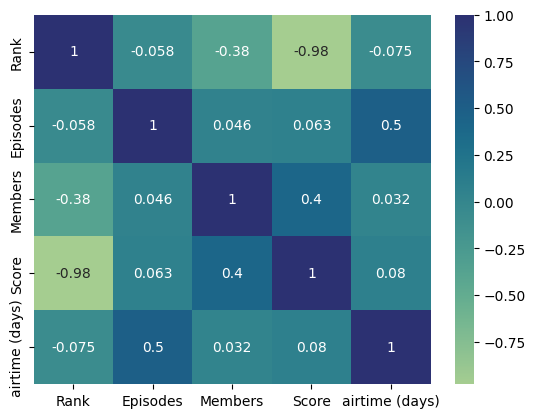

In [257]:
sns.heatmap(df[['Rank', 'Episodes','Members', 'Score', 'airtime (days)']].corr(), annot=True, cmap='crest');

Basic insights - there's a strong negative correlation with Rank and Score (which makes sense - the higher the score, the lower the number for evaluating rank is). We also notice a somewhat positive correlation between Member quantity and score as well as a somewhat negative correlation between Rank and Member count.

To an extent, as the rank goes down, the number of Members - people who have watched the show - go up. To an extent, as the score goes up, the number of people who have watched the show also does.

There appears to be little to no correlation between airtime and these other variables besides Episodes. As airtime increases, to an extent, so does episodes which makes sense. More airtime means that there's more room for the episodes of a show to increase (which is characteristic of the TV shows). Episode count, however, doesn't have much of a correlation with the other variables.

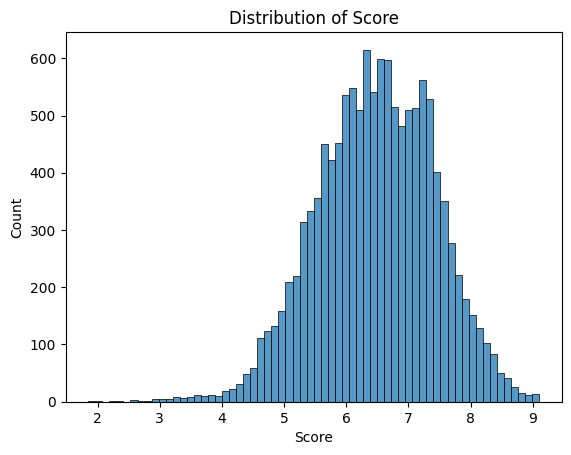

In [258]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.histplot(x='Score', data=df)
plt.title("Distribution of Score")
plt.show()

A majority of the scores rating anime (in this dataset) are to be within the 6-7 range. This will be reflected in the univariate statistics calculated below. There also appears to be more of a slight left-sided skew in the Score data here.

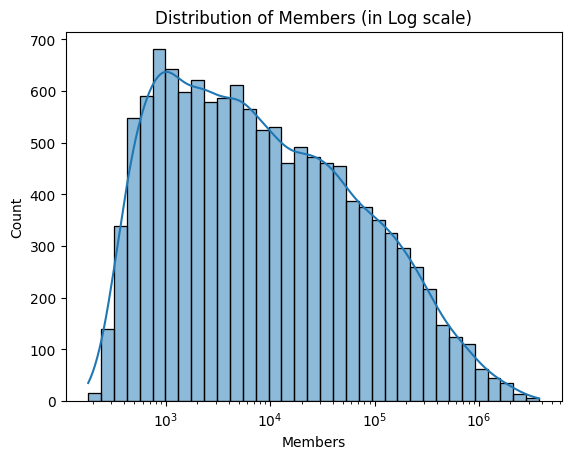

In [259]:
sns.histplot(x='Members', data=df, log_scale=True, kde=True)
plt.title("Distribution of Members (in Log scale)")
plt.show()

Looking at the distribution of members in log scale, there are few shows with incredibly large viewerbases that are registered on MAL compared to the shows with smaller viewerbases - as we see the mode or most frequent count can be found below 10^3 or so. More and more fall between 1000 and 10000 but its not a very steep decline in the distribution.

There's a rightward skew in the distribution of log-transformed member counts for the show, it's not a particularly normal distribution.

In [260]:
columns_to_analyze = ['Episodes', 'Members', 'Score', 'airtime (days)']

# Initialize a dictionary to hold the data
univariate_stats = {}

# Populate the dictionary with statistics for each column
for column in columns_to_analyze:
    univariate_stats[column] = {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'std': df[column].std(),
        'min': df[column].min(),
        'max': df[column].max(),
        'count': df[column].count(),
        'unique_values': df[column].nunique(),
    }

In [261]:
pip install tabulate

In [262]:
from tabulate import tabulate

# Example: Displaying the univariate_stats dictionary in a table format
headers = ["Statistic", "mean", "median", "std", "min", "max", "count", "unique_values"]
rows = []

# Loop through the univariate_stats dictionary to prepare the rows
# Loop through the dictionary and prepare rows for each statistic
for stat, values in univariate_stats.items():
    rows.append([stat] + list(values.values()))  # Concatenate the stat name with its values

# Print the table
print(tabulate(rows, headers=headers, tablefmt='grid'))

+----------------+-------------+----------+---------------+--------+----------------+---------+-----------------+
| Statistic      |        mean |   median |           std |    min |            max |   count |   unique_values |
+================+=============+==========+===============+========+================+=========+=================+
| Episodes       |    13.3543  |      3   |     52.997    |   1    | 3057           |   12660 |             187 |
+----------------+-------------+----------+---------------+--------+----------------+---------+-----------------+
| Members        | 71021.6     |   6572.5 | 214125        | 181    |    3.75901e+06 |   12660 |            9489 |
+----------------+-------------+----------+---------------+--------+----------------+---------+-----------------+
| Score          |     6.47294 |      6.5 |      0.942971 |   1.85 |    9.1         |   12660 |             564 |
+----------------+-------------+----------+---------------+--------+----------------+---

# Image Data

In [263]:
pip install requests Pillow

**NOTE: PRIOR TO THIS NEXT STEP, CREATE A FOLDER CALLED "MAL_pics"**.

This is where the images are to be stored.


In [ ]:
import requests
from PIL import Image
from io import BytesIO

def download_and_save_image(url, image_path):
     try:
         # Attempt to fetch the image
         response = requests.get(url)
         response.raise_for_status()  # This will raise an HTTPError if the status is 4xx or 5xx

         # Open the image and convert it to 'RGB' if necessary
         img = Image.open(BytesIO(response.content))

         # Convert 'P' mode images to 'RGB'
         if img.mode != 'RGB':
             img = img.convert('RGB')

         # Save the image to the specified path
         img.save(image_path)
         return True  # 'True' if the image is successfully saved
     except requests.exceptions.RequestException:

         return False  # Return False if the download fails


image_paths = []
for i, row in df.iterrows():
    url = row['image_url']  # Use the 'image_url' column
    image_path = f"/content/MAL_pics/image_{i}.jpg"

    # Attempt to download and save the image
    if download_and_save_image(url, image_path):
        image_paths.append(image_path)  # Append the path if successful
    else:
        image_paths.append(None)  # Append None if download failed


# Add image paths to the dataframe
df['image_path'] = image_paths


In [ ]:
import os

# Specify the path to your folder
folder_path = '/content/MAL_pics'

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]  # Modify extensions if needed

# Get the quantity of image files
num_images = len(image_files)



In [4]:
# Show the dataframe with image paths
df.head(15)


,id,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,Start_year,End_year,airtime (days),image_path
0,0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55,2017-10-01,2017-12-01,61,/content/MAL_pics/image_0.jpg
1,1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55,1997-07-01,1997-07-31,30,/content/MAL_pics/image_1.jpg
2,2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29,2015-01-01,2015-01-31,30,/content/MAL_pics/image_2.jpg
3,3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36,2001-07-01,2001-12-01,153,/content/MAL_pics/image_3.jpg
4,4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44,2018-12-01,2019-04-01,121,/content/MAL_pics/image_4.jpg
5,5,Hana to Mogura,10991,Movie,1,1970 - 1970,595,https://myanimelist.net/anime/13089/Hana_to_Mo...,https://cdn.myanimelist.net/r/100x140/images/a...,5.45,1970-01-01,1970-01-31,30,/content/MAL_pics/image_5.jpg
6,6,Drifters (OVA): Kokuou-sama Goranshin,7084,Special,1,Dec 2017 - Dec 2017,7242,https://myanimelist.net/anime/37046/Drifters_O...,https://cdn.myanimelist.net/r/100x140/images/a...,6.37,2017-12-01,2017-12-31,30,/content/MAL_pics/image_6.jpg
7,7,Himitsukessha Taka no Tsume,8653,TV,11,Apr 2006 - Jun 2006,1216,https://myanimelist.net/anime/4737/Himitsukess...,https://cdn.myanimelist.net/r/100x140/images/a...,6.05,2006-04-01,2006-06-01,61,/content/MAL_pics/image_7.jpg
8,8,Nyanpire The Animation,5629,TV,12,Jul 2011 - Sep 2011,27709,https://myanimelist.net/anime/10197/Nyanpire_T...,https://cdn.myanimelist.net/r/100x140/images/a...,6.65,2011-07-01,2011-09-01,62,/content/MAL_pics/image_8.jpg
9,9,.hack//Intermezzo,6284,Special,1,Mar 2003 - Mar 2003,23083,https://myanimelist.net/anime/1143/hack__Inter...,https://cdn.myanimelist.net/r/100x140/images/a...,6.52,2003-03-01,2003-03-31,30,/content/MAL_pics/image_9.jpg


In [5]:
df.shape

(12641, 14)

Of all the images we could not obtain (whether it be in JPG format or RGB format), we only had about 19 lost due to the URL not being found.

In [6]:
none_image_paths = df[df['image_path'].isna() | (df['image_path'] == None)]
none_image_paths[['Title', 'image_path']]

In [110]:
df = df.dropna(subset=['image_path'])
df.reset_index(drop=True, inplace=True)


In [134]:
df.head()

,id,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,Start_year,End_year,airtime (days),image_path
0,0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55,2017-10-01,2017-12-01,61,/content/MAL_pics/image_0.jpg
1,1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55,1997-07-01,1997-07-31,30,/content/MAL_pics/image_1.jpg
2,2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29,2015-01-01,2015-01-31,30,/content/MAL_pics/image_2.jpg
3,3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36,2001-07-01,2001-12-01,153,/content/MAL_pics/image_3.jpg
4,4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44,2018-12-01,2019-04-01,121,/content/MAL_pics/image_4.jpg


In [37]:
print(df.shape)

(12641, 14)


## For if Breaking the glass is necessary

If we crash or the runtime is disconnected, then you can save and download and re-utilize the data modified dataframe and image folder later.

Uncomment if these are necessary.

In [113]:
#df.to_csv('/content/MAL.csv', index=False)


In [4]:
from google.colab import files

# Download the saved CSV file
#files.download('/content/MAL.csv')

In [5]:
import shutil

# Compress the folder into a zip file
#shutil.make_archive('/content/MAL_pics', 'zip', '/content/MAL_pics')

In [118]:
#files.download('/content/MAL_pics.zip')


Accessing the zipped folder and making a new directory to hold the pictures. Uncomment if this is needed.

In [38]:
import zipfile
import os

# Path to the uploaded zip file
#zip_file_path = '/content/MAL_pics.zip'

# Put contents of the zip file into a new directory
#extract_dir = '/content/MAL_pics'

# Make sure the extraction directory exists
#os.makedirs(extract_dir, exist_ok=True)

# Open and extract the zip file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_dir)


## Image Testing

In [39]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

folder_path = "/content/MAL_pics"

# Get the list of image files in the folder
images = os.listdir(folder_path)


<Figure size 1000x800 with 0 Axes>

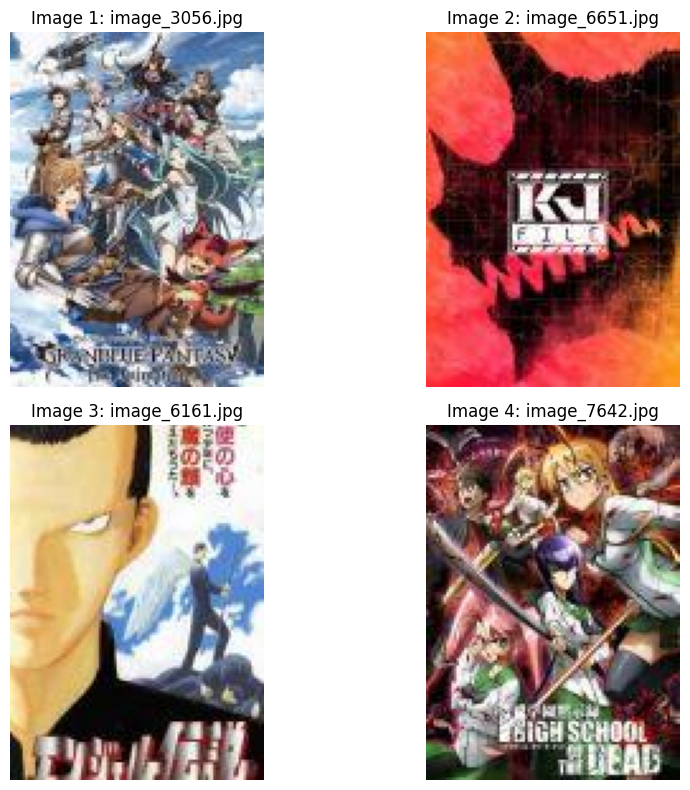

In [41]:

random.seed(41)
# Randomly select 4 images

random_images = random.sample(images, 4)

# Set up the figure to display the images
plt.figure(figsize=(10, 8))

# Loop through the randomly selected images
for i, image_name in enumerate(random_images):
    image_path = os.path.join(folder_path, image_name)
    img = Image.open(image_path)

    # Create a subplot for each image (2 rows, 2 columns)
    plt.subplot(2, 2, i + 1)  # (2 rows, 2 columns, position i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i + 1}: {image_name}")

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [42]:
for i, image_name in enumerate(random_images):
    image_path = os.path.join(folder_path, image_name)
    img = Image.open(image_path)

    # Get the size (width, height) of the image
    width, height = img.size
    print(f"Image {i + 1}: {image_name} - Size: {width}x{height} pixels")

Image 1: image_3056.jpg - Size: 100x140 pixels
Image 2: image_6651.jpg - Size: 100x140 pixels
Image 3: image_6161.jpg - Size: 100x140 pixels
Image 4: image_7642.jpg - Size: 100x140 pixels


All of the images are in 100x140 pixel resolution.

# Easy Delete

If the process of downloading the images fail, then you can easily delete the directory and start again. Simply uncomment the text and then make your changes.

In [81]:
#df = df.drop(columns=['image_path'])

# Verify if the column is removed
#print(df.head())

In [270]:
import os
import glob

# Specify the folder where the images are stored
#image_folder = '/content/MAL_pics/'

# Get a list of all image files in the folder (assuming they have .jpg extension)
#image_files = glob.glob(os.path.join(image_folder, '*.jpg'))

# Delete all the image files
#for image_file in image_files:
#    os.remove(image_file)

#print(f"Deleted {len(image_files)} images.")

Deleted 990 images.


# CNN

In [273]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Set the image width for loading to same dimensions as image
img_width, img_height = 140, 100


label_mapping = {
    'TV': 0,
    'Special': 1,
    'ONA': 2,
    'OVA': 3,
    'Movie': 4
}
# Make a numeric label based on the type
df['label'] = df['Type'].map(label_mapping)


In [49]:

# Ensure the image paths exist
df = df[df['image_path'].apply(lambda x: os.path.exists(x))]

# Loading + preprocessing image method
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)  # Convert image to array
    img_array = img_array / 255.0  # Rescale the image to [0, 1]
    return img_array

# Convert all images and labels to lists / arrays
images = np.array([load_and_preprocess_image(path) for path in df['image_path']])
labels = np.array(df['label'])

# One-hot encode the labels
labels = to_categorical(labels, num_classes=5)


## CNN First Attempt: Simple 3 CNN Layer network

In [14]:
images.shape

(12641, 140, 100, 3)

We utilize an Adam optimizer with categorical crossentropy loss function. Our activation for the output layer is softmax function - this will remain constant.

In [162]:
from tensorflow.keras import layers, models

# Simple CNN architecture for 100x140 images
# CNN blocks with maxpooling in between + Dense layers at the end
model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten data
    # 2 dense layers with a dropout layer in between
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 categories (TV, Special, ONA, OVA, Movie)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Get architecture summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 100, 140, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 50, 70, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 50, 70, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 25, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 35, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 26112)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      13,369,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,465,669 (51.37 MB)

 Trainable params: 13,465,669 (51.37 MB)

 Non-trainable params: 0 (0.00 B)

In [170]:
history = model.fit(
     X_train, y_train,
     validation_data=(X_val, y_val),
     epochs=20,
     batch_size=32,
     callbacks=callbacks
)


Epoch 1/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3278 - loss: 1.6520
Epoch 1: val_loss improved from inf to 1.48337, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.3279 - loss: 1.6517 - val_accuracy: 0.3846 - val_loss: 1.4834 - learning_rate: 0.0010
Epoch 2/20
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3498 - loss: 1.5273
Epoch 2: val_loss improved from 1.48337 to 1.47236, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.3500 - loss: 1.5272 - val_accuracy: 0.3969 - val_loss: 1.4724 - learning_rate: 0.0010
Epoch 3/20
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3900 - loss: 1.4747
Epoch 3: val_loss improved from 1.47236 to 1.43922, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.3900 - loss: 1.4746 - val_accuracy: 0.3984 - val_loss: 1.4392 - learning_rate: 0.0010
Epoch 4/20
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accura

Not great. Of the 20 epochs, it ran 9 and the best validation accuracy achieved for this simple CNN was 0.4192. Furthermore, there was instability / divergence towards the end as the validation loss stopped decreasing and instead started increasing. The model needs further refinement.

## Second Attempt: Refined CNN with Class Weights w/o Data Augmentation

In [50]:
from sklearn.model_selection import train_test_split

# X = images. shape: (12641, 140, 100, 3))
# y = labels. shape: (12641,))

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Further split the train set into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [51]:
integer_labels = np.argmax(y_train, axis=1)
# For the class weight computation

We will utilize class weights to attempt to address class imbalance in the training and test sets. These will be utilized for 2 of the next 3 models.

In [52]:
from sklearn.utils.class_weight import compute_class_weight
# Using class weights for the model fit on training data
# Theoretically, this should improve the predictions
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(integer_labels),
    y=integer_labels
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: 0.572065063649222, 1: 1.2521671826625387, 2: 1.3549413735343383, 3: 1.3282430213464695, 4: 1.039049454078356}


In [26]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(8089, 140, 100, 3)
(2023, 140, 100, 3)
(8089, 5)
(2023, 5)
(2529, 140, 100, 3)
(2529, 5)


We now have our training, test, and validation sets prepared. The validation set is smaller than the test set but it should serve to fine tune our model.

In [140]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=5,              # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the model with the best weights
)

checkpoint = ModelCheckpoint(
    'best_model.keras',         # Save the model to a file
    monitor='val_loss',      # Monitor validation loss
    save_best_only=True,     # Save the best model only
    mode='min',              # Save the model with the minimum loss
    verbose=1                # Print the message when the model is saved
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',      # Monitor validation loss
    factor=0.5,              # Reduce the learning rate by a factor of 0.5
    patience=3,              # Wait for 3 epochs before reducing
    min_lr=1e-6,             # Minimum learning rate
    verbose=1                # Print the message when the learning rate is reduced
)


In [22]:
from tensorflow.keras import layers, models
import tensorflow as tf
model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Global Average Pooling instead of Flatten
    # Will reduce parameters which should limit overfitting
    # Help focus on global context of feature maps rather than spatial locations
    # Which may be helpful for generalization
    layers.GlobalAveragePooling2D(),

    # Dense layers, reduced dropout value
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # Output layer
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 100, 140, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 100, 140, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 50, 70, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 50, 70, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 50, 70, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 25, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 25, 35, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 25, 35, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,757 (635.77 KB)

 Trainable params: 162,309 (634.02 KB)

 Non-trainable params: 448 (1.75 KB)

In [24]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), class_weight=class_weights, callbacks=callbacks)


Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2603 - loss: 1.6239
Epoch 1: val_loss did not improve from 1.52153
253/253 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.2604 - loss: 1.6238 - val_accuracy: 0.2007 - val_loss: 2.0504 - learning_rate: 1.0000e-04
Epoch 2/50
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3164 - loss: 1.5334
Epoch 2: val_loss did not improve from 1.52153
253/253 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.3164 - loss: 1.5334 - val_accuracy: 0.2343 - val_loss: 1.6620 - learning_rate: 1.0000e-04
Epoch 3/50
250/253 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3274 - loss: 1.5199
Epoch 3: val_loss did not improve from 1.52153
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3272 - loss: 1.5199 - val_accuracy: 0.3203 - val_loss: 1.5218 - learning_rate: 1.0000e-04
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3427 - loss: 1.5092
Epoch 4: val_loss improved from 1.52153 to 1.48167, saving model to be

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4018 - loss: 1.3987
Test Loss: 1.4005510807037354
Test Accuracy: 0.41004350781440735


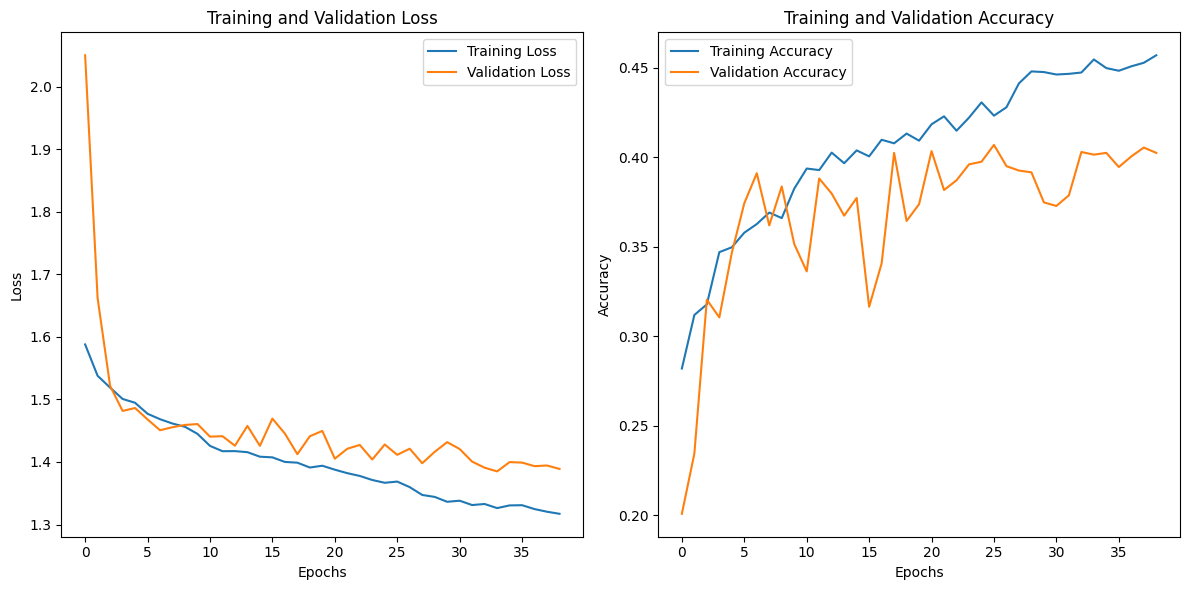

In [26]:
import matplotlib.pyplot as plt


# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

At best we are achieving a 41% accuracy at predicting anime media type using the cover images alone. We trained for more epochs, but it was pretty choppy. May indicate overfitting. The dataset may not be suitably large for reducing over or underfitting. To address that, let's utilize data augmentation for the next models.

## Third Attempt: Refined CNN with Class Weights w/ Data Augmentation

Need to continue to remake the checkpoints so that the loss it compares the model to for its patience resets. This way our training isn't cut short.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


In [141]:
callbacks = [early_stopping, checkpoint, reduce_lr]


In [142]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


We will be utilizing a Google Colab GPU for testing.

Here we add the data augmentation for the images.

In [143]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Use data augmentation
# Width shift, height shift, zoom, shear, fill, flip and rotation
# All to improve generalization
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)



In [144]:
from tensorflow.keras import layers, models
import tensorflow as tf
model1 = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.GlobalAveragePooling2D(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # Output layer
])


model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 100, 140, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 100, 140, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 50, 70, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 50, 70, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 50, 70, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 25, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 25, 35, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 25, 35, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 12, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_11          │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,757 (635.77 KB)

 Trainable params: 162,309 (634.02 KB)

 Non-trainable params: 448 (1.75 KB)

In [145]:
# Train the model directly using augmented data with class weighting
history = model1.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Generates augmented batches
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
)

Epoch 1/50
251/253 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.2514 - loss: 1.6226
Epoch 1: val_loss improved from inf to 1.90492, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 57s 198ms/step - accuracy: 0.2517 - loss: 1.6223 - val_accuracy: 0.1997 - val_loss: 1.9049 - learning_rate: 1.0000e-04
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3047 - loss: 1.5546
Epoch 2: val_loss improved from 1.90492 to 1.57862, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 59s 120ms/step - accuracy: 0.3047 - loss: 1.5546 - val_accuracy: 0.2625 - val_loss: 1.5786 - learning_rate: 1.0000e-04
Epoch 3/50
251/253 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.3191 - loss: 1.5306
Epoch 3: val_loss improved from 1.57862 to 1.44966, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 40s 120ms/step - accuracy: 0.3190 - loss: 1.5306 - val_accuracy: 0.3900 - val_loss: 1.4497 - learning_rate: 1.0000e-04
Epoch 4/50
252/253 ━━━━━━━━━━━━━━━━━━━━ 0

This time it trained for 17 out of the 50 epochs.

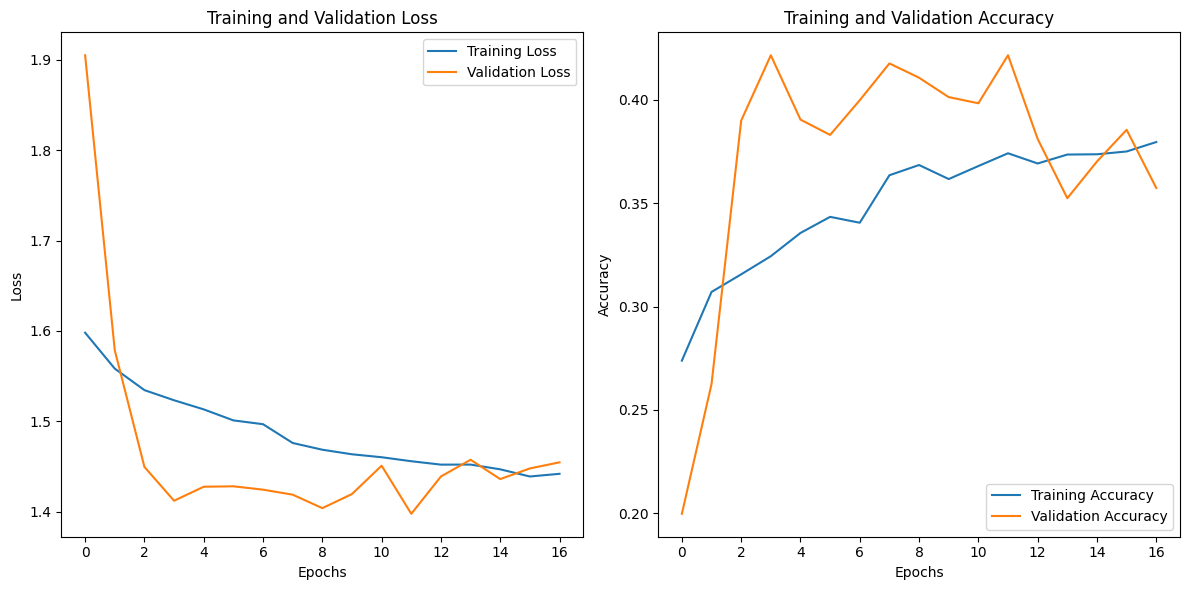

In [146]:
import matplotlib.pyplot as plt


# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [150]:
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss1}")
print(f"Test Accuracy: {test_accuracy1}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4256 - loss: 1.4093
Test Loss: 1.411325216293335
Test Accuracy: 0.42467379570007324


Test accuracy of 42.47% and test loss of 1.4113. It is still relatively choppy and the model trained for fewer epochs. But its doing surprisingly better than the training accuracy and loss.

May be a sign of underfitting? Could be having flukes or learning more from random noise.

In [147]:
predictions1 = model1.predict(X_test)

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [153]:
# predictions are one-hot encoded. Change back to the numeric class labels.
predicted_classes1 = np.argmax(predictions1, axis=1)

# y_test is one-hot encoded. Change it back to the numeric class labels.
true_classes1 = np.argmax(y_test, axis=1)

In [154]:
pd.DataFrame(predicted_classes1).value_counts()

,count
0,
0,1374
4,569
2,268
3,254
1,64


We see that it predicted 'Special' the least out of all the classes.

In [46]:
df['Type'].value_counts()

,count
Type,
TV,4440
Movie,2477
Special,2005
OVA,1874
ONA,1845


In [56]:
pd.DataFrame(np.argmax(y_train, axis=1)).value_counts()

,count
0,
0,2828
4,1557
1,1292
3,1218
2,1194


In [45]:
label_mapping

{'TV': 0, 'Special': 1, 'ONA': 2, 'OVA': 3, 'Movie': 4}

Surprisingly, the model does not predict Specials very often despite them having the 3rd highest portion of the whole data set and the 3rd highest portion of the whole training set, too.

In [155]:
print(classification_report(true_classes1, predicted_classes1))


              precision    recall  f1-score   support

           0       0.48      0.73      0.58       898
           1       0.28      0.05      0.08       390
           2       0.40      0.29      0.34       370
           3       0.26      0.19      0.22       356
           4       0.40      0.44      0.42       515

    accuracy                           0.42      2529
   macro avg       0.36      0.34      0.33      2529
weighted avg       0.39      0.42      0.38      2529



Our F1 scores and accuracy are relatively low for every class but especially low for Specials. Utilizing class weights is important, however, if we want to ensure that predictions do come out for every class as the CNN is not naturally capable of discerning OVAs from all the categories (perhaps especially TV shows) on its own, even with data augmentation. This is reflected by an example without weighting.

### Addendum to Third Attempt: Augmentation Without class weights.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


In [ ]:
callbacks = [early_stopping, checkpoint, reduce_lr]


In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf
model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.GlobalAveragePooling2D(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # Output layer
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [41]:
# Train the model directly using only augmented data, no weights
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

Epoch 1/50
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.3639 - loss: 1.5462
Epoch 1: val_loss improved from inf to 1.92142, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 48s 167ms/step - accuracy: 0.3639 - loss: 1.5461 - val_accuracy: 0.1997 - val_loss: 1.9214 - learning_rate: 1.0000e-04
Epoch 2/50
251/253 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3789 - loss: 1.4913
Epoch 2: val_loss improved from 1.92142 to 1.50728, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 31s 121ms/step - accuracy: 0.3789 - loss: 1.4913 - val_accuracy: 0.3327 - val_loss: 1.5073 - learning_rate: 1.0000e-04
Epoch 3/50
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3861 - loss: 1.4761
Epoch 3: val_loss improved from 1.50728 to 1.43664, saving model to best_model.keras
253/253 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - accuracy: 0.3861 - loss: 1.4761 - val_accuracy: 0.3989 - val_loss: 1.4366 - learning_rate: 1.0000e-04
Epoch 4/50
252/253 ━━━━━━━━━━━━━━━━━━━━ 0

It trained for 10 epochs out of 50 this time.

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4290 - loss: 1.4068
Test Loss: 1.4180619716644287
Test Accuracy: 0.4215104877948761


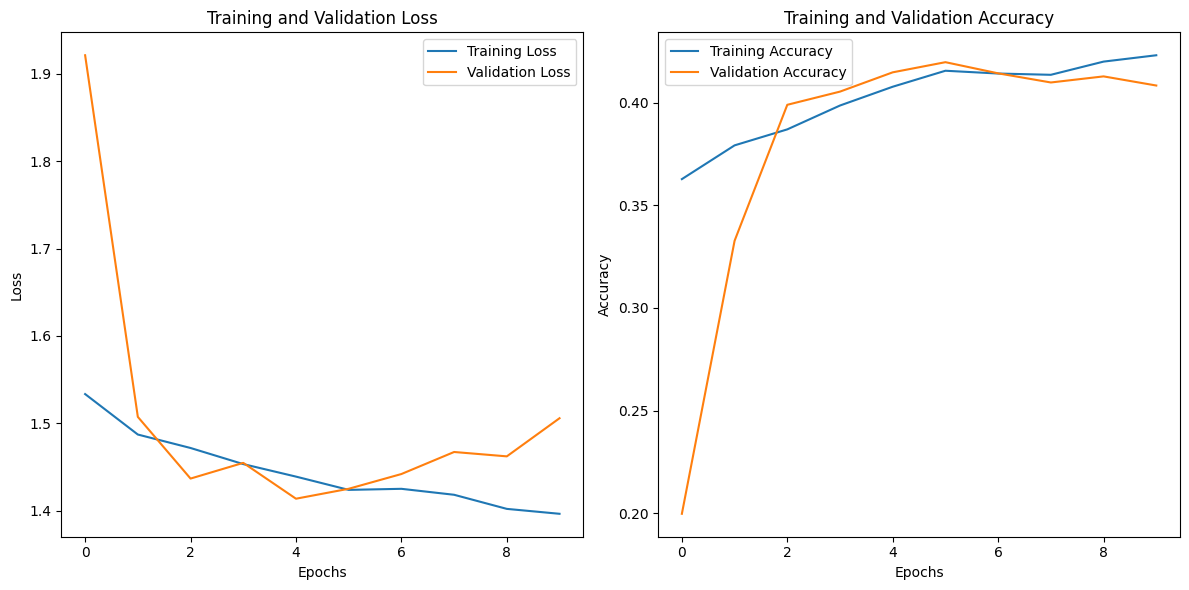

In [43]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# You can access the history of training metrics through the 'history' attribute

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

We obtained comparable accuracy to our weighted model and the training appears slightly less choppy or unstable, though it has trained for fewer epochs.

Test accuracy of 42.15%, test loss of 1.4181.

In [100]:
predictions = keras_mod.predict(X_test)

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [101]:
predicted_classes = np.argmax(predictions, axis=1)

# y_test is one-hot encoded. Convert to class labels (numbers)
true_classes = np.argmax(y_test, axis=1)

In [102]:
true_classes

array([4, 3, 0, ..., 0, 2, 0])

Refer back to the label mapping as we read this.

In [115]:
label_mapping

{'TV': 0, 'Special': 1, 'ONA': 2, 'OVA': 3, 'Movie': 4}

In [121]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, predicted_classes))


              precision    recall  f1-score   support

           0       0.42      0.95      0.59       898
           1       0.30      0.05      0.09       390
           2       0.43      0.21      0.28       370
           3       0.00      0.00      0.00       356
           4       0.44      0.22      0.29       515

    accuracy                           0.42      2529
   macro avg       0.32      0.29      0.25      2529
weighted avg       0.35      0.42      0.32      2529



In [122]:
pd.DataFrame(predicted_classes).value_counts()

,count
0,
0,2025
4,252
2,182
1,70


However, this "comparable" success is somewhat hollow as there was a few major issues with the model's predictions.

It did not once predict OVAs. Even with augmented data, it was not capable of doing so. The majority of the predictions seem to be tied up with making predictions for TV shows as it makes up a large portion of the test data.

As a side note, we also attempted utilizing a pre-trained model (ImageNet).

While we would like to use a pre-trained model to improve our predictive capacity, this has computational issues with memory and has crashed the session almost immediately.

Future work for classifying the images would benefit from utilizing a OCR to not only identify any text on the image but use that identified text and read it or translate it to, theoretically, cheat through any predictions (as some may identify they are a "Special" or "Movie" within their names).

# Pytorch Model for Transformers on Title

Let's begin our work with BERT.

In [74]:
pip install transformers torch


In [75]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pre-trained mBERT and tokenizer
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=5)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


A number of animated shows are written with Romaji in the titles (for example: '*Net-Juu no Susume*', the first entry in the dataset).

To process those words, we'll need to use Multilingual BERT tokenizer.

In [76]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd

# Load pre-trained multilingual BERT and tokenizer
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [77]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Preprocess the titles
def preprocess_title(title):
    title = title.lower()  # Convert to lowercase
    title = title.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    title = ' '.join([word for word in title.split() if word not in ENGLISH_STOP_WORDS])  # Remove stop words
    return title

In [78]:
df['processed_title'] = df['Title'].apply(preprocess_title)


In [79]:
# Tokenize all titles at once with padding and truncation
inputs = tokenizer(df['processed_title'].tolist(),
                   padding=True,
                   truncation=True,
                   return_tensors="pt",
                   max_length=128)

Now all that's left is to convert the data into a usable form and start training the model.

In [80]:
# Convert labels to Pytorch tensor
labels = torch.tensor(df['label'].tolist())


In [81]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(inputs['input_ids'], labels, test_size=0.2, random_state=42)


In [82]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

torch.Size([10112, 42])
torch.Size([2529, 42])
torch.Size([10112])
torch.Size([2529])


In [83]:
# Create TensorDatasets and DataLoaders for batching
train_dataset = TensorDataset(X_train, inputs['attention_mask'][:len(X_train)], y_train)
val_dataset = TensorDataset(X_val, inputs['attention_mask'][len(X_train):], y_val)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [84]:
# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [87]:
# Training setup for multiclass classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# Enter training mode
model.train()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [89]:
from sklearn.metrics import accuracy_score
import numpy as np

# Make an early stopping callback
class EarlyStopping:
    def __init__(self, patience=3, delta=0, model=None):
        self.patience = patience
        self.delta = delta
        self.best_loss = np.inf
        self.best_epoch = 0
        self.counter = 0

        # Save best weights here
        self.best_model_wts = None

        # Pass the model to save best weights
        self.model = model

    def should_stop(self, val_loss, epoch):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.best_epoch = epoch
            self.counter = 0
            # Save the model weights
            self.best_model_wts = self.model.state_dict()
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Early stopping at epoch {epoch+1}.")
                return True
            return False

In [90]:
# Train model with early stopping callback and model-saving.
early_stopping = EarlyStopping(patience=3, delta=0.01, model=model)
for epoch in range(20):
    total_loss = 0
    model.train()
    for batch in train_dataloader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Training Loss: {total_loss / len(train_dataloader)}")

    # Validation step - go into evaluation mode
    model.eval()
    val_labels = []
    val_preds = []
    val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            val_loss += loss.item()
            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(predictions.cpu().numpy())

    avg_val_loss = val_loss / len(val_dataloader)
    print(f"Epoch {epoch+1}, Test Loss: {avg_val_loss}")

    accuracy = accuracy_score(val_labels, val_preds)
    print(f"Epoch {epoch+1}, Test Accuracy: {accuracy}")
    print()

    # Check for early stopping and save best model
    if early_stopping.should_stop(avg_val_loss, epoch):
        # Load the best weights (i.e., model with lowest validation loss)
        model.load_state_dict(early_stopping.best_model_wts)
        # Save the best model
        torch.save(model.state_dict(), 'best_model_weights.pth')
        break

Epoch 1, Training Loss: 1.487812046008774
Epoch 1, Test Loss: 1.3541480630636216
Epoch 1, Test Accuracy: 0.46026097271648875

Epoch 2, Training Loss: 1.354761969439591
Epoch 2, Test Loss: 1.3196407958865166
Epoch 2, Test Accuracy: 0.47568208778173193

Epoch 3, Training Loss: 1.2935670755709274
Epoch 3, Test Loss: 1.2951722607016563
Epoch 3, Test Accuracy: 0.49466192170818507

Epoch 4, Training Loss: 1.228751333265365
Epoch 4, Test Loss: 1.2671971440315246
Epoch 4, Test Accuracy: 0.5029655990510083

Epoch 5, Training Loss: 1.1250453317844415
Epoch 5, Test Loss: 1.313999319076538
Epoch 5, Test Accuracy: 0.4974298141557928

Epoch 6, Training Loss: 1.0036279055513913
Epoch 6, Test Loss: 1.3721722435206174
Epoch 6, Test Accuracy: 0.49505733491498616

Epoch 7, Training Loss: 0.8685497153031675
Epoch 7, Test Loss: 1.4286280617117881
Epoch 7, Test Accuracy: 0.49545274812178725

Early stopping at epoch 7.


Best model had a test loss of 1.2672 and a test accuracy of 0.5030.

Let's evaluate how these predictions were.

In [109]:
# Load the best model weights
model.load_state_dict(torch.load('best_model_weights.pth'))
model.eval()  # Set the model to evaluation mode

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

Let's look at the testing / validation dataset for gaining insights as to how it made its predictions.

In [118]:
from sklearn.metrics import classification_report


# Define the device (gpu if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the selected device
model.to(device)

# Assuming `y_val` is already a tensor, move it to the same device as the model
y_val = y_val.to(device)

with torch.no_grad():
    for batch in val_dataloader:
        # Move tensors to the same device as the model (gpu or cpu)
        # Need to keep track or else errors come up about being in gpu or cpu
        input_ids, attention_mask, labels = [tensor.to(device) for tensor in batch]

        # Run the model
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        # Direct comparison of predictions with y_val (both on the same device)
        # Convert the labels and predictions to numpy on the cpu
        val_preds.extend(predictions.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

print(classification_report(val_labels, val_preds))


              precision    recall  f1-score   support

           0       0.50      0.69      0.58       898
           1       0.50      0.46      0.48       390
           2       0.61      0.36      0.46       370
           3       0.36      0.24      0.29       356
           4       0.51      0.44      0.47       515

    accuracy                           0.50      2529
   macro avg       0.49      0.44      0.46      2529
weighted avg       0.50      0.50      0.48      2529



In [120]:
label_mapping
# For reference

{'TV': 0, 'Special': 1, 'ONA': 2, 'OVA': 3, 'Movie': 4}

Highest F1 score goes to  TV Shows with an F1 of 0.58. Lowest F1 score goes to OVAs, with an F1 of 0.29. Much like with the CNNs, it has a hard time distinguishing OVAs from the other types of media.

Lastly, lets try getting some predictions in and out. I will be utilizing the Romaji / English names (aka opposite name) or alternative name from MAL from what is in the dataset.

In [172]:
examples = ['Shingeki no Kyojin', 'Fullmetal Alchemist: Brotherhood OVA Collection', 'Fuuto PI', "Howl's Moving Castle", "Star Blazers: Space Battleship Yamato 2199", 'Demon Lord 2099', 'Maou 2099']

class_labels = ['TV', 'Special', 'ONA', 'OVA', 'Movie']

In [173]:
inputs = tokenizer(examples, padding=True, truncation=True, return_tensors="pt", max_length=128)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = {key: value.to(device) for key, value in inputs.items()}

# Make sure model is also on the correct device
model.to(device)

# Make predictions
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)  # Get the predicted class indices

# Convert predictions to a list (if needed) or numpy array
predictions = predictions.cpu().numpy()

In [174]:
predicted_labels = [class_labels[pred] for pred in predictions]
# Assign labels to the predictions

In [175]:
# Print predictions
for title, label in zip(examples, predicted_labels):
    print(f"Title: {title}, Predicted Type: {label}")

Title: Shingeki no Kyojin, Predicted Type: TV
Title: Fullmetal Alchemist: Brotherhood OVA Collection, Predicted Type: Special
Title: Fuuto PI, Predicted Type: TV
Title: Howl's Moving Castle, Predicted Type: Movie
Title: Star Blazers: Space Battleship Yamato 2199, Predicted Type: Movie
Title: Demon Lord 2099, Predicted Type: TV
Title: Maou 2099, Predicted Type: TV


6/7 correct. The only incorrect one is Space Battleship Yamato. All of the first 5 are within the dataset but Demon Lord 2099 / Maou 2099 are new.

# Baseline Models

Finally, we will construct baseline models to compare to CNN model and our Transformer model.

### Episodes

As episode counts are nonstandard or not limited to a group of values, we'll utilize a StandardScaler to limit the impact of long running series on the predictions (though in a sense that might help predictions too).

With a dataset of more than 10000 entries, we'll utilize the L-BFGS solver to speed up calculations and efficiency for a "larger" dataset.

In [ ]:
ep = df['Episodes']  # Feature = episode count
lab = df['label']  # Target = media type label


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
# Split into training and testing sets
eptr, epte, labtr, labte = train_test_split(ep, lab, test_size=0.2, random_state=42)

eptr = eptr.values.reshape(-1, 1)  # Reshape the Series to 2D

# Scale the features for logistic regression
scaler = StandardScaler()
eptr_scaled = scaler.fit_transform(eptr)
epte_scaled = scaler.transform(epte.values.reshape(-1, 1))

In [60]:
# Make Logistic Regression model using the 'lbfgs' solver
logreg = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')
logreg.fit(eptr_scaled, labtr)

# Evaluate the model
eptr_acc = logreg.score(eptr_scaled, labtr)  # Training data
epte_acc = logreg.score(epte_scaled, labte)  # Test data

print(f"Training Accuracy: {eptr_acc}")
print(f"Testing Accuracy: {epte_acc}")

Training Accuracy: 0.5544897151898734
Testing Accuracy: 0.5709766706207987


In [61]:
eptr, epte, labtr, labte = train_test_split(ep, lab, test_size=0.2, random_state=42)
eptr = eptr.values.reshape(-1, 1)  # Reshape the Series to 2D

# Scale the features for SVM
scaler = StandardScaler()
eptr_scaled = scaler.fit_transform(eptr)
epte_scaled = scaler.transform(epte.values.reshape(-1, 1))

# Create and train the Support Vector Machine model
svm = SVC(kernel='rbf', max_iter=200)  # Using RBF kernel, best one
svm.fit(eptr_scaled, labtr)

# Evaluate the model
SVMtr_predictions_eptr = svm.predict(eptr_scaled)
SVMte_predictions_epte = svm.predict(epte_scaled)

SVM_accuracy_eptr = accuracy_score(labtr, SVMtr_predictions_eptr) # Train
SVM_accuracy_epte = accuracy_score(labte, SVMte_predictions_epte) # Test

print(f"Training Accuracy: {SVM_accuracy_eptr}")
print(f"Testing Accuracy: {SVM_accuracy_epte}")

Training Accuracy: 0.3203125
Testing Accuracy: 0.3250296559905101


### Score

Given that score operates on a 0-10 scale, we will utilize a MinMaxScaler to scale the data.

In [62]:
sc = df['Score']  # Feature = score
lab = df['label']  # Target = media type label

In [63]:
sctr, scte, labtr, labte = train_test_split(sc, lab, test_size=0.2, random_state=42)

sctr = sctr.values.reshape(-1, 1)


scaler = MinMaxScaler()
sctr_scaled = scaler.fit_transform(sctr)
scte_scaled = scaler.transform(scte.values.reshape(-1, 1))

In [64]:
logreg = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')
logreg.fit(sctr_scaled, labtr)

# Evaluate the model
sctr_acc = logreg.score(sctr_scaled, labtr)
scte_acc = logreg.score(scte_scaled, labte)

print(f"Training Accuracy: {sctr_acc}")
print(f"Testing Accuracy: {scte_acc}")

Training Accuracy: 0.3705498417721519
Testing Accuracy: 0.3819691577698695


In [65]:
sctr, scte, labtr, labte = train_test_split(sc, lab, test_size=0.2, random_state=42)
sctr = sctr.values.reshape(-1, 1)


scaler = MinMaxScaler()
sctr_scaled = scaler.fit_transform(sctr)
scte_scaled = scaler.transform(scte.values.reshape(-1, 1))


svm = SVC(kernel='linear', max_iter=200)  # 'linear' kernel best here
svm.fit(sctr_scaled, labtr)

# Evaluate the model
SVMtr_predictions_sctr = svm.predict(sctr_scaled)
SVMte_predictions_scte = svm.predict(scte_scaled)

SVM_accuracy_sctr = accuracy_score(labtr, SVMtr_predictions_sctr)
SVM_accuracy_scte = accuracy_score(labte, SVMte_predictions_scte)

print(f"Training Accuracy: {SVM_accuracy_sctr}")
print(f"Testing Accuracy: {SVM_accuracy_scte}")

Training Accuracy: 0.2633504746835443
Testing Accuracy: 0.2708580466587584


### Airtime (days)

In [66]:
da = df['airtime (days)']  # Feature = airtime in days
lab = df['label']  # Target = media type label

In [67]:

datr, date, labtr, labte = train_test_split(da, lab, test_size=0.2, random_state=42)

datr = datr.values.reshape(-1, 1)


scaler = StandardScaler()
datr_scaled = scaler.fit_transform(datr)
date_scaled = scaler.transform(date.values.reshape(-1, 1))

In [68]:

logreg = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')
logreg.fit(datr_scaled, labtr)


datr_acc = logreg.score(datr_scaled, labtr)
date_acc = logreg.score(date_scaled, labte)

print(f"Training Accuracy: {datr_acc}")
print(f"Testing Accuracy: {date_acc}")

Training Accuracy: 0.5311511075949367
Testing Accuracy: 0.5476472914195334


In [69]:
datr, date, labtr, labte = train_test_split(da, lab, test_size=0.2, random_state=42)
datr = datr.values.reshape(-1, 1)


scaler = StandardScaler()
datr_scaled = scaler.fit_transform(datr)
date_scaled = scaler.transform(date.values.reshape(-1, 1))


svm = SVC(kernel='rbf', max_iter=200)  # 'rbf' kernel best one
svm.fit(datr_scaled, labtr)

# Evaluate the model
SVMtr_predictions_datr = svm.predict(datr_scaled)
SVMte_predictions_date = svm.predict(date_scaled)

SVM_accuracy_datr = accuracy_score(labtr, SVMtr_predictions_datr)
SVM_accuracy_date = accuracy_score(labte, SVMte_predictions_date)

print(f"Training Accuracy: {SVM_accuracy_datr}")
print(f"Testing Accuracy: {SVM_accuracy_date}")

Training Accuracy: 0.24960443037974683
Testing Accuracy: 0.258204824041123


## Baseline Results

Utilizing tabulate to provide a better looking presentation of the test accuracies results.

In [70]:
pip install tabulate

In [71]:
from tabulate import tabulate

headers = ["Model", "Test Accuracy"]

baseline_results = [
    ["LogReg Episodes", epte_acc],
    ["SVM Episodes", SVM_accuracy_epte],
    ["LogReg Scores", scte_acc],
    ["SVM Scores", SVM_accuracy_scte],
    ["LogReg Airtime (days)", date_acc],
    ["SVM Airtime (days)", SVM_accuracy_date]
]

pretty_table = tabulate(baseline_results, headers=headers, tablefmt="grid")

print("Baseline Models Performance:\n")
print(pretty_table)


Baseline Models Performance:

+-----------------------+-----------------+
| Model                 |   Test Accuracy |
+=======================+=================+
| LogReg Episodes       |        0.570977 |
+-----------------------+-----------------+
| SVM Episodes          |        0.32503  |
+-----------------------+-----------------+
| LogReg Scores         |        0.381969 |
+-----------------------+-----------------+
| SVM Scores            |        0.270858 |
+-----------------------+-----------------+
| LogReg Airtime (days) |        0.547647 |
+-----------------------+-----------------+
| SVM Airtime (days)    |        0.258205 |
+-----------------------+-----------------+


To an extent, these baseline results were expected. The highest test accuracy was for the Logistic Regression models of using Episodes and Airtime (days) to predict the type of show / medium it was.

If a show has multiple episodes, it's more likely to be a TV series. One-episode shows are very likely to be a movie or a special - single entries disproportionately make up those entries. Similarly, longer / seasonal run times are more characteristic of TV shows.

These sorts of simpler, more linear separations may be why we see the logistic regression models for "airtime (days)" and "Episodes" seem to have the highest baseline test accuracy, even more than our cover-image based model.  